# https://github.com/evanbudianto/forecasting-with-fbprophet/tree/main

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from prophet import Prophet
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline

In [172]:
df_order = pd.read_csv("./orders.csv",sep=";")
df_holiday = pd.read_csv("./holidays.csv",sep=";")

In [173]:
df_holiday.head()

,Campaign Name,Date
0,Double-Double Campaign,01/01/2020
1,Payday Sale,25/01/2020
2,Double-Double Campaign,02/02/2020
3,Payday Sale,25/02/2020
4,Double-Double Campaign,03/03/2020


In [174]:
df_order.head()

,order_date,total_order,product_1,product_2,product_3,product_4,product_5,product_6
0,01/01/2020,8794,50,2436,1504,510,1776,2518
1,02/01/2020,3496,622,622,210,877,717,448
2,03/01/2020,3384,562,328,1022,589,447,436
3,04/01/2020,3325,53,50,1007,894,888,433
4,05/01/2020,3230,74,543,759,849,601,404


In [175]:
df_order['order_date'] = pd.to_datetime(df_order['order_date'],format="%d/%m/%Y")
df_order = df_order.set_index('order_date')
df_order.head()

,total_order,product_1,product_2,product_3,product_4,product_5,product_6
order_date,,,,,,,
2020-01-01,8794,50,2436,1504,510,1776,2518
2020-01-02,3496,622,622,210,877,717,448
2020-01-03,3384,562,328,1022,589,447,436
2020-01-04,3325,53,50,1007,894,888,433
2020-01-05,3230,74,543,759,849,601,404


In [176]:
def show_plots():
    fig = make_subplots(rows=3, cols=2,subplot_titles=df_order.columns.to_list()[1:])
    fig.add_trace(
        go.Scatter(x=df_order.index,y=df_order['product_1']),
        row=1, col=1)
    fig.add_trace(
        go.Scatter(x=df_order.index,y=df_order['product_2']),
        row=1, col=2)
    fig.add_trace(
        go.Scatter(x=df_order.index,y=df_order['product_3']),
        row=2, col=1)
    fig.add_trace(
        go.Scatter(x=df_order.index,y=df_order['product_4']),
        row=2, col=2)
    fig.add_trace(
        go.Scatter(x=df_order.index,y=df_order['product_5']),
        row=3, col=1)
    fig.add_trace(
        go.Scatter(x=df_order.index,y=df_order['product_6']),
        row=3, col=2)
    fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
    fig.show()

show_plots()

In [177]:
df_holiday.columns = ['holiday','ds']

In [178]:
df_order.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-02-19', '2021-02-20', '2021-02-21', '2021-02-22',
               '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26',
               '2021-02-27', '2021-02-28'],
              dtype='datetime64[ns]', name='order_date', length=425, freq=None)

In [179]:
#splitting the order data into train and test
df_train = df_order.loc[:'2021-01-31',:]
df_test = df_order.loc['2021-02-01':,:]

In [180]:
df_train_1 = df_train.loc[:,['product_1']].reset_index().rename({'order_date':'ds','product_1':'y'},axis=1)
df_train_2 = df_train.loc[:,['product_2']].reset_index().rename({'order_date':'ds','product_1':'y'},axis=1)
df_train_3 = df_train.loc[:,['product_3']].reset_index().rename({'order_date':'ds','product_1':'y'},axis=1)
df_train_4 = df_train.loc[:,['product_4']].reset_index().rename({'order_date':'ds','product_1':'y'},axis=1)
df_train_5 = df_train.loc[:,['product_5']].reset_index().rename({'order_date':'ds','product_1':'y'},axis=1)
df_train_6 = df_train.loc[:,['product_6']].reset_index().rename({'order_date':'ds','product_1':'y'},axis=1)

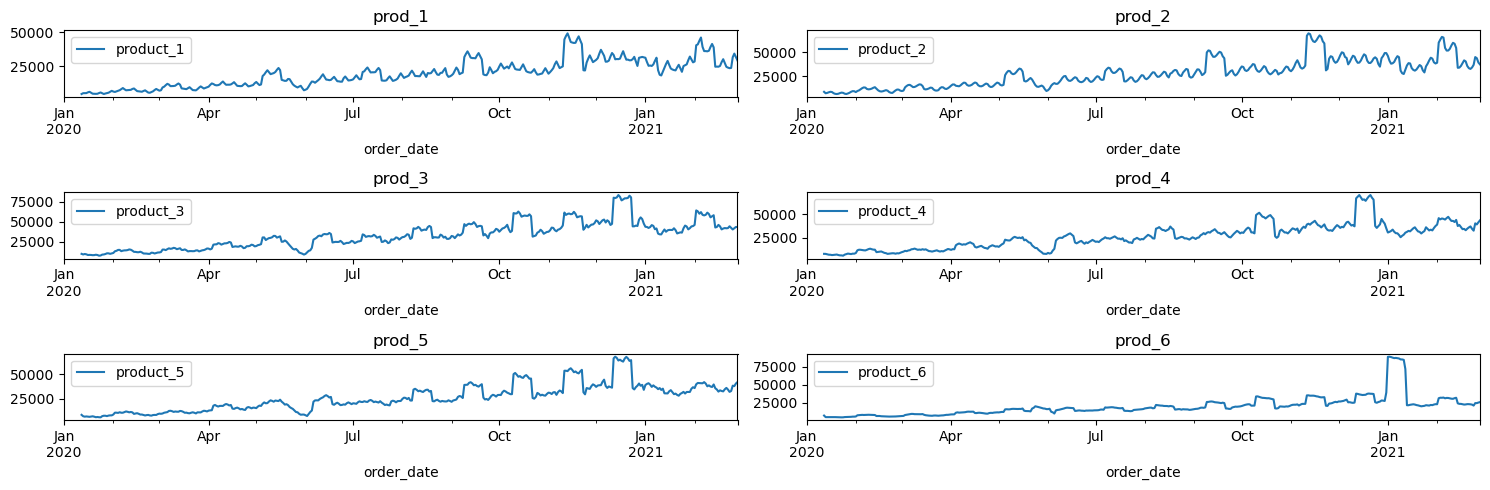

In [181]:
# try to see the trend of each product by rolling mean smoothing
def show_trend(window:int=None)->plt.figure:
    plt.figure(figsize=(15,5))
    layout = (3,2)
    p1_ax = plt.subplot2grid(layout,(0,0))
    p2_ax = plt.subplot2grid(layout,(0,1))
    p3_ax = plt.subplot2grid(layout,(1,0))
    p4_ax = plt.subplot2grid(layout,(1,1))
    p5_ax = plt.subplot2grid(layout,(2,0))
    p6_ax = plt.subplot2grid(layout,(2,1))
    df_order.loc[:,["product_1"]].rolling(window=window).agg('sum').plot(kind="line",ax=p1_ax,title="prod_1")
    df_order.loc[:,["product_2"]].rolling(window=window).agg('sum').plot(kind="line",ax=p2_ax,title="prod_2")
    df_order.loc[:,["product_3"]].rolling(window=window).agg('sum').plot(kind="line",ax=p3_ax,title="prod_3")
    df_order.loc[:,["product_4"]].rolling(window=window).agg('sum').plot(kind="line",ax=p4_ax,title="prod_4")
    df_order.loc[:,["product_5"]].rolling(window=window).agg('sum').plot(kind="line",ax=p5_ax,title="prod_5")
    df_order.loc[:,["product_6"]].rolling(window=window).agg('sum').plot(kind="line",ax=p6_ax,title="prod_6")
    plt.tight_layout()
    plt.show()

show_trend(window=12)

# It is evident that all the product follows upward trend over time

In [182]:
def show_seasonality() -> plt.figure:
    fig = make_subplots(rows=3, cols=2,subplot_titles=df_order.columns.to_list()[1:])
    fig.add_trace(
        go.Scatter(x=df_order.index,y=sm.tsa.seasonal_decompose(df_order['product_1']).seasonal),
        row=1, col=1)
    fig.add_trace(
        go.Scatter(x=df_order.index,y=sm.tsa.seasonal_decompose(df_order['product_2']).seasonal),
        row=1, col=2)
    fig.add_trace(
        go.Scatter(x=df_order.index,y=sm.tsa.seasonal_decompose(df_order['product_3']).seasonal),
        row=2, col=1)
    fig.add_trace(
        go.Scatter(x=df_order.index,y=sm.tsa.seasonal_decompose(df_order['product_4']).seasonal),
        row=2, col=2)
    fig.add_trace(
        go.Scatter(x=df_order.index,y=sm.tsa.seasonal_decompose(df_order['product_5']).seasonal),
        row=3, col=1)
    fig.add_trace(
        go.Scatter(x=df_order.index,y=sm.tsa.seasonal_decompose(df_order['product_6']).seasonal),
        row=3, col=2)
    fig.update_layout(height=500, width=1400, title_text="Seasonality of all products")
    fig.show()

show_seasonality()


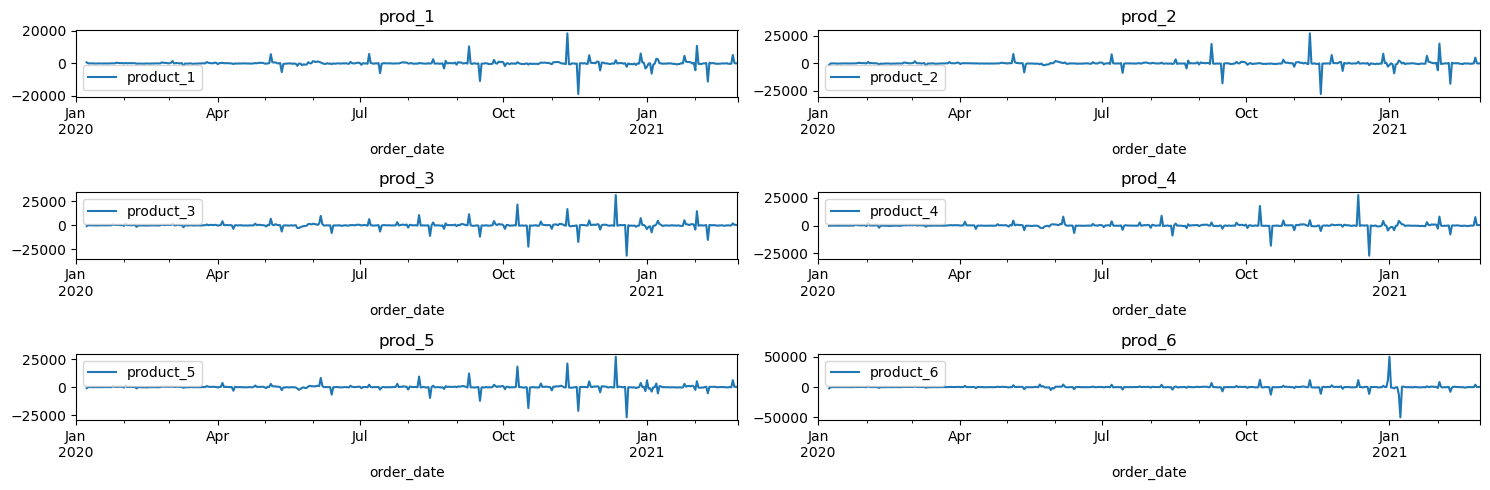

In [183]:
def show_plots_after_removing_trend_seasonality(diff:int)->plt.figure:
    plt.figure(figsize=(15,5))
    layout = (3,2)
    p1_ax = plt.subplot2grid(layout,(0,0))
    p2_ax = plt.subplot2grid(layout,(0,1))
    p3_ax = plt.subplot2grid(layout,(1,0))
    p4_ax = plt.subplot2grid(layout,(1,1))
    p5_ax = plt.subplot2grid(layout,(2,0))
    p6_ax = plt.subplot2grid(layout,(2,1))
    df_order.loc[:,["product_1"]].diff(diff).plot(kind="line",ax=p1_ax,title="prod_1")
    df_order.loc[:,["product_2"]].diff(diff).plot(kind="line",ax=p2_ax,title="prod_2")
    df_order.loc[:,["product_3"]].diff(diff).plot(kind="line",ax=p3_ax,title="prod_3")
    df_order.loc[:,["product_4"]].diff(diff).plot(kind="line",ax=p4_ax,title="prod_4")
    df_order.loc[:,["product_5"]].diff(diff).plot(kind="line",ax=p5_ax,title="prod_5")
    df_order.loc[:,["product_6"]].diff(diff).plot(kind="line",ax=p6_ax,title="prod_6")
    plt.tight_layout()
    plt.show()

show_plots_after_removing_trend_seasonality(diff=7)

In [184]:
def adf_test(col:str):
    ad_test = sm.tsa.stattools.adfuller(df_order.loc[:,[col]].diff(7).dropna())
    return {'col_name' : col,
            'test_statistic': ad_test[0],
            'p_value': ad_test[1],
            '1%_significance': ad_test[4]['1%'],
            '5%_significance':ad_test[4]['5%'],
            '10%_significance': ad_test[4]['10%']}
    

def adf_test_all_product() -> pd.DataFrame:
   df = pd.DataFrame.from_records([adf_test(col) for col in df_order.columns[1:]])
   df['stationarity'] = np.where(df['p_value'] < df['5%_significance'],'non-stationary','stationary')
   return df

adf_test_all_product()

,col_name,test_statistic,p_value,1%_significance,5%_significance,10%_significance,stationarity
0,product_1,-7.545842,3.285395e-11,-3.446722,-2.868757,-2.570614,stationary
1,product_2,-7.538593,3.425623e-11,-3.446681,-2.868739,-2.570605,stationary
2,product_3,-7.335544,1.099033e-10,-3.446681,-2.868739,-2.570605,stationary
3,product_4,-6.967915,8.816772e-10,-3.446681,-2.868739,-2.570605,stationary
4,product_5,-9.032704,5.391074e-15,-3.446640,-2.868721,-2.570595,stationary
5,product_6,-9.959262,2.397756e-17,-3.446640,-2.868721,-2.570595,stationary


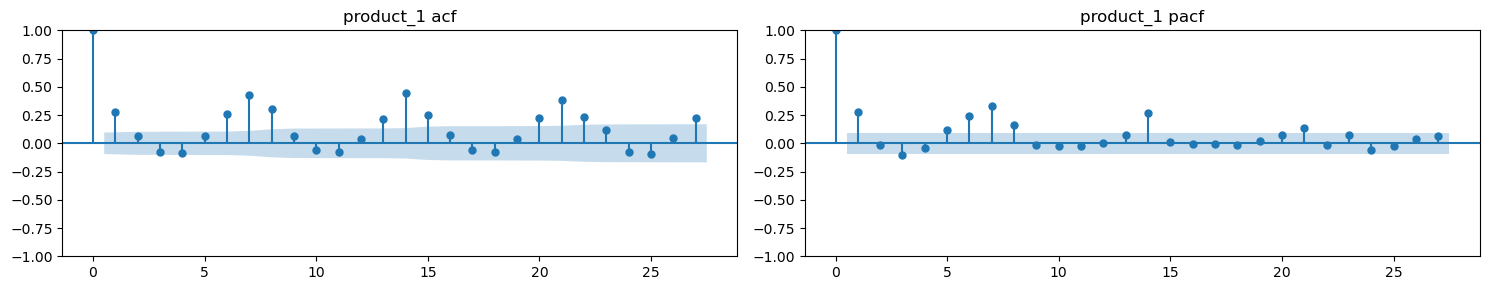

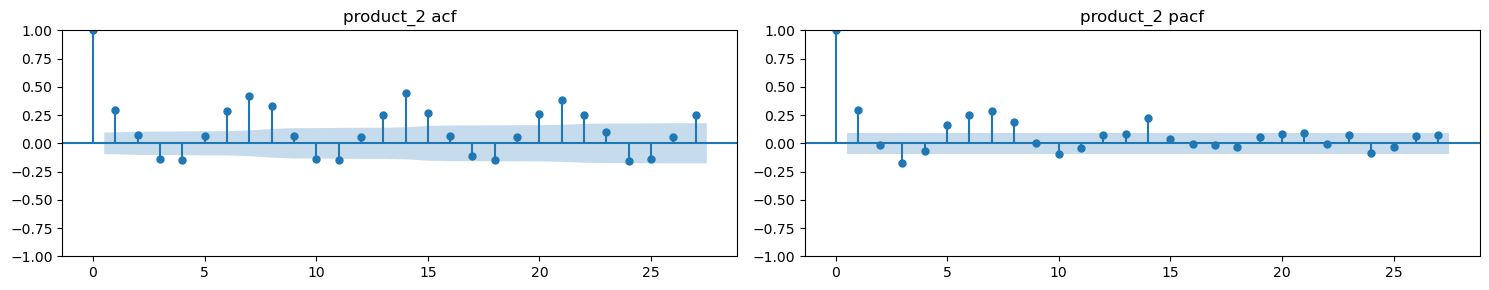

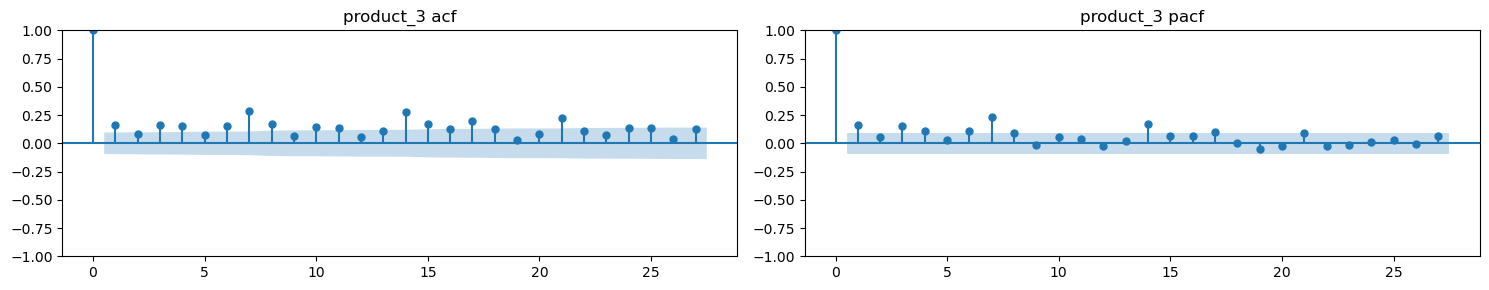

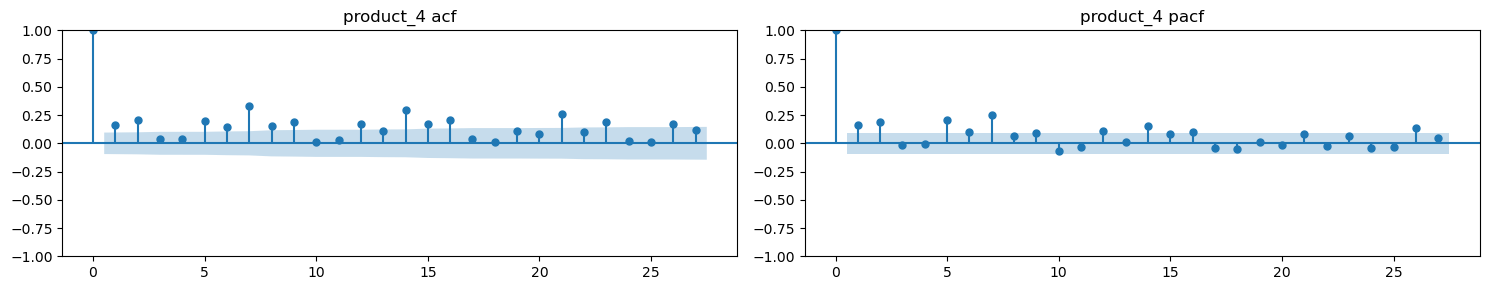

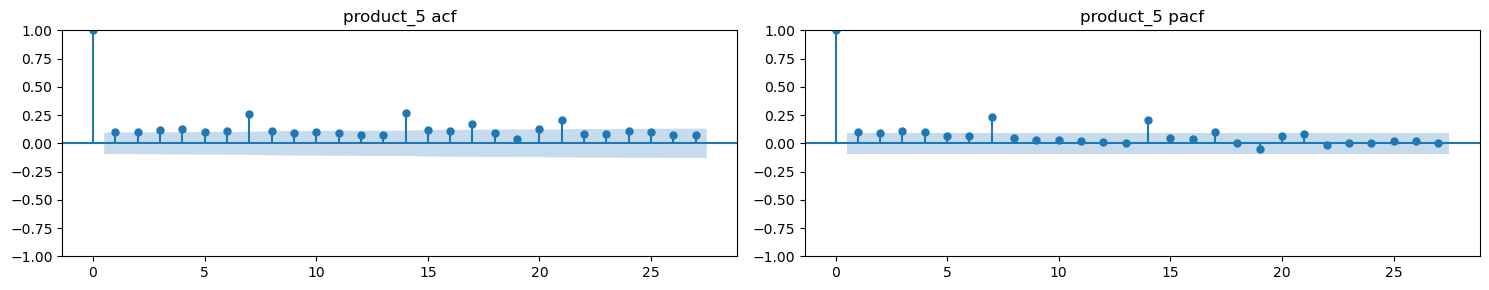

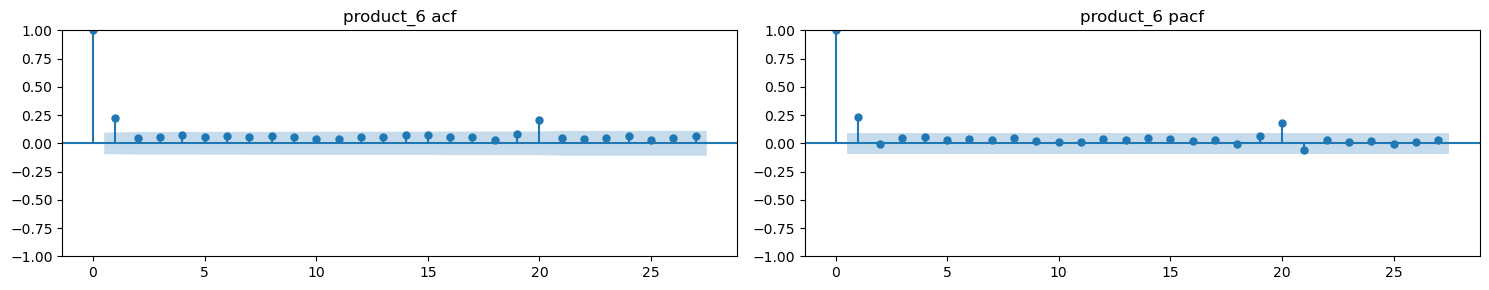

In [185]:
def show_acf_pacf(col:str=None) -> plt.figure:
    plt.figure(figsize=(15,3))
    layout = (1,2)
    acf_ax = plt.subplot2grid(layout,(0,0))
    pacf_ax = plt.subplot2grid(layout,(0,1))
    sm.graphics.tsa.plot_acf(x=df_order[col],ax=acf_ax)
    sm.graphics.tsa.plot_pacf(x=df_order[col],ax=pacf_ax)
    acf_ax.set_title(col+" acf")
    pacf_ax.set_title(col+" pacf")
    plt.tight_layout()
    plt.show()

for col in df_order.columns[1:]: 
    show_acf_pacf(col)

# this shows that all the products followed a weekly seasonality

In [186]:
def create_model_and_predict(col:str=None) -> Prophet:
    model = Prophet(weekly_seasonality=True,holidays=df_holiday)
    return model.fit(df_train[col].reset_index().rename({'order_date':'ds',col:'y'},axis=1)).predict(
    df_test.loc[:,[col]].reset_index().drop([col],axis=1).rename({'order_date':'ds'},axis=1))

In [187]:
prod1_pred = create_model_and_predict('product_1')

prod2_pred = create_model_and_predict('product_2')

prod3_pred = create_model_and_predict('product_3')

prod4_pred = create_model_and_predict('product_4')

prod5_pred = create_model_and_predict('product_5')

prod6_pred = create_model_and_predict('product_6')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

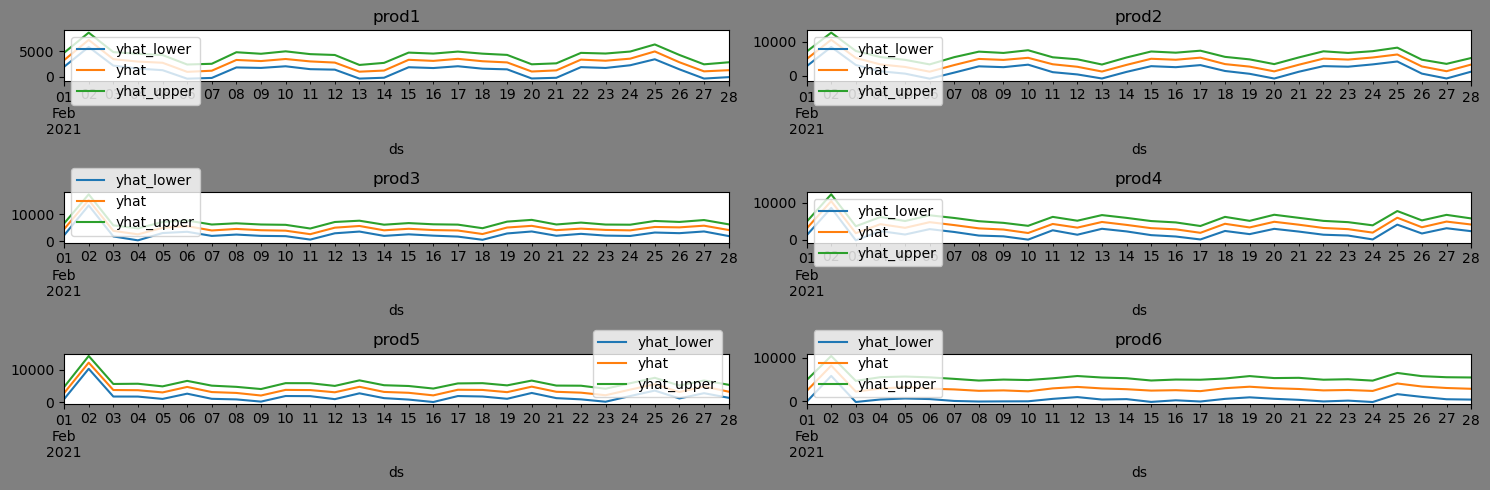

In [188]:
def show_forecast_plot() -> plt.figure:
    fig,ax = plt.subplots(nrows=3,ncols=2)
    fig.set_facecolor(color="grey")
    fig.set_figheight(val=5)
    fig.set_figwidth(val=15)
    prod1_pred.set_index('ds')[['yhat_lower','yhat','yhat_upper']].plot(kind="line",ax=ax[0,0],title='prod1')
    prod2_pred.set_index('ds')[['yhat_lower','yhat','yhat_upper']].plot(kind="line",ax=ax[0,1],title='prod2')
    prod3_pred.set_index('ds')[['yhat_lower','yhat','yhat_upper']].plot(kind="line",ax=ax[1,0],title='prod3')
    prod4_pred.set_index('ds')[['yhat_lower','yhat','yhat_upper']].plot(kind="line",ax=ax[1,1],title='prod4')
    prod5_pred.set_index('ds')[['yhat_lower','yhat','yhat_upper']].plot(kind="line",ax=ax[2,0],title='prod5')
    prod6_pred.set_index('ds')[['yhat_lower','yhat','yhat_upper']].plot(kind="line",ax=ax[2,1],title='prod6')
    plt.tight_layout()
    plt.show()

show_forecast_plot()

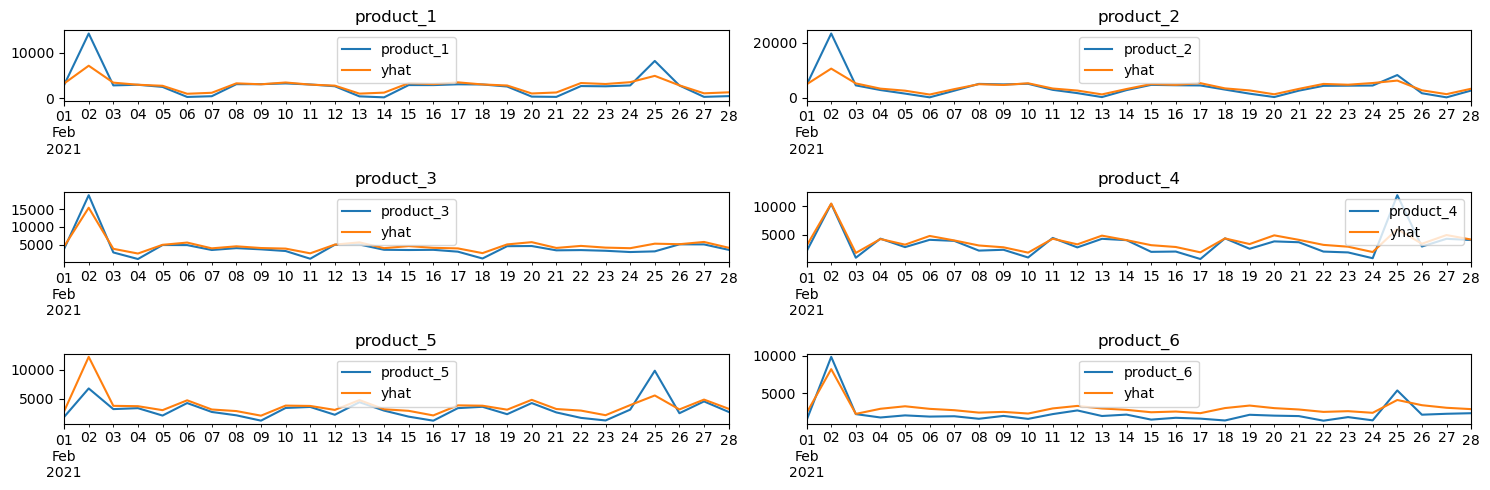

In [189]:
# plotting forecast vs real for all the products
from typing import List
def plot_forecast_vs_real(*cols) -> plt.figure:
    fig,ax = plt.subplots(nrows=3,ncols=2)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    pd.concat([df_test[cols[0]],prod1_pred.set_index('ds')[['yhat_lower','yhat','yhat_upper']]],axis=1)[[cols[0],'yhat']].plot(kind="line",ax=ax[0,0],title="product_1")
    pd.concat([df_test[cols[1]],prod2_pred.set_index('ds')[['yhat_lower','yhat','yhat_upper']]],axis=1)[[cols[1],'yhat']].plot(kind="line",ax=ax[0,1],title="product_2")
    pd.concat([df_test[cols[2]],prod3_pred.set_index('ds')[['yhat_lower','yhat','yhat_upper']]],axis=1)[[cols[2],'yhat']].plot(kind="line",ax=ax[1,0],title="product_3")
    pd.concat([df_test[cols[3]],prod4_pred.set_index('ds')[['yhat_lower','yhat','yhat_upper']]],axis=1)[[cols[3],'yhat']].plot(kind="line",ax=ax[1,1],title="product_4")
    pd.concat([df_test[cols[4]],prod5_pred.set_index('ds')[['yhat_lower','yhat','yhat_upper']]],axis=1)[[cols[4],'yhat']].plot(kind="line",ax=ax[2,0],title="product_5")
    pd.concat([df_test[cols[5]],prod6_pred.set_index('ds')[['yhat_lower','yhat','yhat_upper']]],axis=1)[[cols[5],'yhat']].plot(kind="line",ax=ax[2,1],title="product_6")
    plt.tight_layout()
    plt.show()

plot_forecast_vs_real('product_1','product_2','product_3','product_4','product_5','product_6')

In [190]:
# measuring the accuracies of the forecast predictions by comparing with the actual values
def measure_accuracy(*cols) -> None:
    print(sm.tools.eval_measures.meanabs(df_test['product_1'],prod1_pred.set_index('ds')['yhat']))
    print(sm.tools.eval_measures.meanabs(df_test['product_2'],prod2_pred.set_index('ds')['yhat']))
    print(sm.tools.eval_measures.meanabs(df_test['product_3'],prod3_pred.set_index('ds')['yhat']))
    print(sm.tools.eval_measures.meanabs(df_test['product_4'],prod4_pred.set_index('ds')['yhat']))
    print(sm.tools.eval_measures.meanabs(df_test['product_5'],prod5_pred.set_index('ds')['yhat']))
    print(sm.tools.eval_measures.meanabs(df_test['product_6'],prod6_pred.set_index('ds')['yhat']))



measure_accuracy('product_1','product_2','product_3','product_4','product_5','product_6')

778.891615016494
1125.8636735988753
896.2104637545742
803.5358308064473
926.5752400981195
932.299759978694
